# Práctica 7 — Evaluación de algoritmos de clasificación y regresión con Python

**Contexto:**
- **Fuente de datos Pacientes:** Muestra de alrededor de 700 pacientes con datos médicos: número de embarazos, glucosa, presión sanguínea, grosor de piel, valor de insulina, índice de masa corporal, antecedentes diabéticos, edad, diagnóstico.
- **Fuente de datos Viviendas:** Conjunto de datos en valores numéricos de vivienda en diversas ciudades de un Estado. Se requiere evaluar el rendimiento de regresión para estas viviendas.

**Objetivo:** Utilizar diversas métricas para la evaluación de rendimiento de algoritmos de clasificación y regresión.

**Referencias:**
- https://link.springer.com/book/10.1007/978-3-031-33342-2
- https://www.wiley.com/en-us/Introduction+to+Machine+Learning+with+Python-p-9781449369415

In [1]:
# Instalación e importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Configuración para visualizaciones
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(7)  # Semilla para reproducibilidad

print("Librerías importadas correctamente")

Librerías importadas correctamente


## Actividad 1: Evaluar la clasificación de los pacientes

**Tareas:**
- a) Utilice validación cruzada con 10 iteraciones y semilla aleatoria semilla-7 para la generación de escenario de pruebas en pacientes
- b) Genere el modelo de clasificación con regresión logística
- c) Calcule la precisión (accuracy) del proceso de clasificación, como el número de predicciones correctas / todas las predicciones realizadas
- d) Calcule la perdida logaritmica (logarithmic loss) del proceso de clasificacion indicado en los incisos a y b
- e) Calcule el area bajo la curva (ROC) (sensitividad/especificificidad) del proceso de clasificacion indicado en los incisos a y b 
- f) Obtenga la matriz de confusion de la precisión de la clasificación de pacientes por regresión logística. PERO utlizando muestra de entrenamiento de 67% (bien balanceada)
- g) Obtenga el reporte de clasificacion (metricas precisión recall, f1, support) de la precisión de la clasificación de pacientes por regresión logística. PERO utlizando muestra de entrenamiento de 67% (bien balanceada)
- h) Establezca una reflexión entre los diferentes resultados de la evaluacion del modelo de clasificacion

In [2]:
# Cargar datos de pacientes
pacientes_path = 'pacientes.csv'
df_pacientes = pd.read_csv(pacientes_path)

print("Información del dataset de pacientes:")
print(f"Dimensiones: {df_pacientes.shape}")
print(f"\nPrimeras 5 filas:")
print(df_pacientes.head())

print(f"\nInformación del dataset:")
print(df_pacientes.info())

print(f"\nDistribución de la variable objetivo:")
if 'Outcome' in df_pacientes.columns:
    print(df_pacientes['Outcome'].value_counts())
elif 'target' in df_pacientes.columns:
    print(df_pacientes['target'].value_counts())
else:
    print("Columnas disponibles:", df_pacientes.columns.tolist())

Información del dataset de pacientes:
Dimensiones: (767, 9)

Primeras 5 filas:
   0  137  40  35  168  43.1  2.288  33  1
0  0  118  84  47  230  45.8  0.551  31  1
1  0  180  66  39    0  42.0  1.893  25  1
2  0  100  88  60  110  46.8  0.962  31  0
3  0  146  82   0    0  40.5  1.781  44  0
4  0  105  64  41  142  41.5  0.173  22  0

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       767 non-null    int64  
 1   137     767 non-null    int64  
 2   40      767 non-null    int64  
 3   35      767 non-null    int64  
 4   168     767 non-null    int64  
 5   43.1    767 non-null    float64
 6   2.288   767 non-null    float64
 7   33      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Distribución de la variable objetivo:
Columnas disponibles: ['0', '13

In [3]:
# Preparar datos para clasificación
# Identificar la variable objetivo (normalmente la última columna)
target_col = df_pacientes.columns[-1]  # Asumimos que la última columna es el target
print(f"Variable objetivo identificada: {target_col}")

# Separar características (X) y variable objetivo (y)
X_pacientes = df_pacientes.drop(columns=[target_col])
y_pacientes = df_pacientes[target_col]

print(f"\nCaracterísticas (X): {X_pacientes.shape}")
print(f"Variable objetivo (y): {y_pacientes.shape}")
print(f"\nDistribución de clases:")
print(y_pacientes.value_counts())
print(f"\nPorcentajes:")
print(y_pacientes.value_counts(normalize=True) * 100)

Variable objetivo identificada: 1

Características (X): (767, 8)
Variable objetivo (y): (767,)

Distribución de clases:
1
0    500
1    267
Name: count, dtype: int64

Porcentajes:
1
0    65.189048
1    34.810952
Name: proportion, dtype: float64


In [4]:
# a) y b) Validación cruzada con regresión logística (semilla-7, 10 iteraciones)
modelo_logistico = LogisticRegression(random_state=7, max_iter=1000)

# Realizar validación cruzada con múltiples métricas
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(modelo_logistico, X_pacientes, y_pacientes, 
                           cv=10, scoring=scoring, return_train_score=True)

print("=== RESULTADOS DE VALIDACIÓN CRUZADA (10-fold, semilla-7) ===")
print(f"\nAccuracy (Precisión):")
print(f"  Media: {cv_results['test_accuracy'].mean():.4f}")
print(f"  Desviación estándar: {cv_results['test_accuracy'].std():.4f}")
print(f"  Valores individuales: {cv_results['test_accuracy']}")

print(f"\nPrecision:")
print(f"  Media: {cv_results['test_precision'].mean():.4f}")
print(f"  Desviación estándar: {cv_results['test_precision'].std():.4f}")

print(f"\nRecall (Sensibilidad):")
print(f"  Media: {cv_results['test_recall'].mean():.4f}")
print(f"  Desviación estándar: {cv_results['test_recall'].std():.4f}")

print(f"\nF1-Score:")
print(f"  Media: {cv_results['test_f1'].mean():.4f}")
print(f"  Desviación estándar: {cv_results['test_f1'].std():.4f}")

=== RESULTADOS DE VALIDACIÓN CRUZADA (10-fold, semilla-7) ===

Accuracy (Precisión):
  Media: 0.7521
  Desviación estándar: 0.0814
  Valores individuales: [0.74025974 0.81818182 0.72727273 0.81818182 0.80519481 0.76623377
 0.76623377 0.80263158 0.75       0.52631579]

Precision:
  Media: 0.7378
  Desviación estándar: 0.1577

Recall (Sensibilidad):
  Media: 0.5751
  Desviación estándar: 0.1376

F1-Score:
  Media: 0.6189
  Desviación estándar: 0.0638


=== ANÁLISIS DETALLADO DE ACCURACY ===
Accuracy promedio: 0.7521
Accuracy mínimo: 0.5263
Accuracy máximo: 0.8182
Intervalo de confianza (95%): [0.5925, 0.9116]


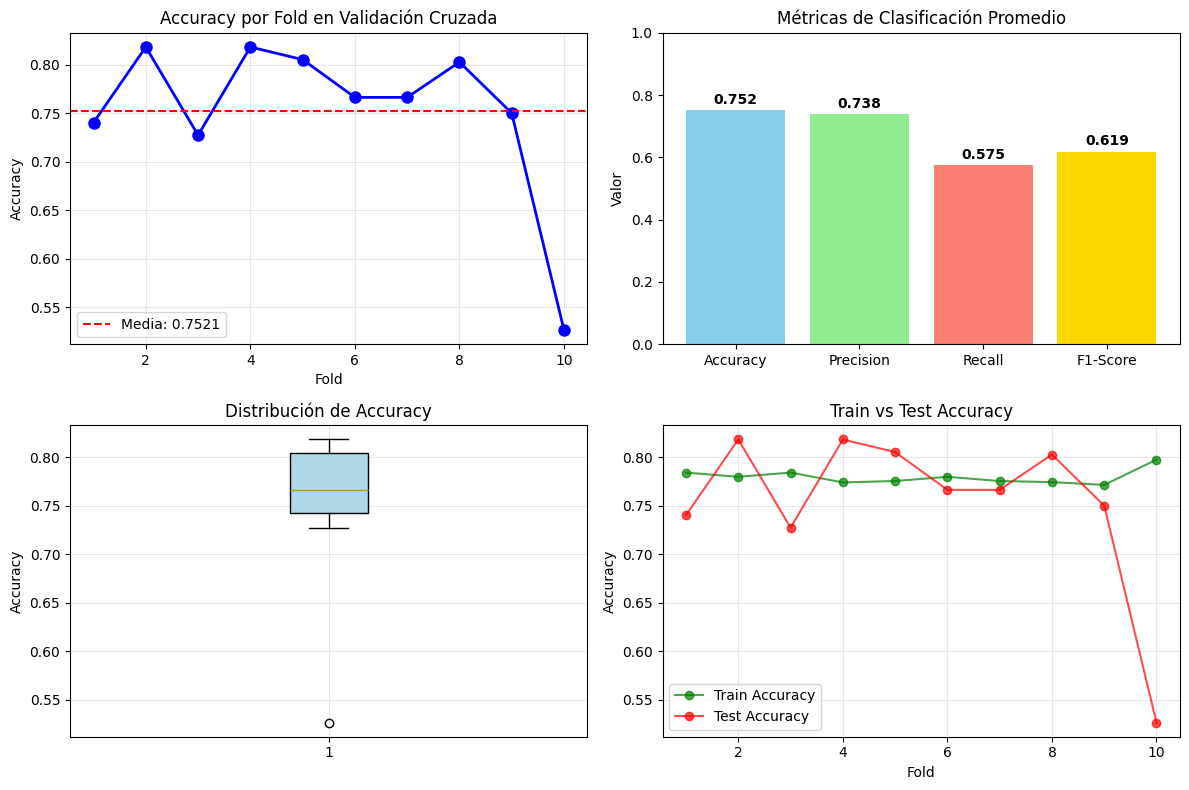

In [5]:
# c) Cálculo detallado de accuracy
accuracy_scores = cv_results['test_accuracy']
print("=== ANÁLISIS DETALLADO DE ACCURACY ===")
print(f"Accuracy promedio: {accuracy_scores.mean():.4f}")
print(f"Accuracy mínimo: {accuracy_scores.min():.4f}")
print(f"Accuracy máximo: {accuracy_scores.max():.4f}")
print(f"Intervalo de confianza (95%): [{accuracy_scores.mean() - 1.96*accuracy_scores.std():.4f}, {accuracy_scores.mean() + 1.96*accuracy_scores.std():.4f}]")

# Visualización de resultados
plt.figure(figsize=(12, 8))

# Subplot 1: Accuracy por fold
plt.subplot(2, 2, 1)
plt.plot(range(1, 11), accuracy_scores, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=accuracy_scores.mean(), color='r', linestyle='--', label=f'Media: {accuracy_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy por Fold en Validación Cruzada')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Distribución de métricas
plt.subplot(2, 2, 2)
metrics_data = {
    'Accuracy': cv_results['test_accuracy'].mean(),
    'Precision': cv_results['test_precision'].mean(),
    'Recall': cv_results['test_recall'].mean(),
    'F1-Score': cv_results['test_f1'].mean()
}
plt.bar(metrics_data.keys(), metrics_data.values(), color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.ylabel('Valor')
plt.title('Métricas de Clasificación Promedio')
plt.ylim(0, 1)
for i, (k, v) in enumerate(metrics_data.items()):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Subplot 3: Boxplot de accuracy
plt.subplot(2, 2, 3)
plt.boxplot(accuracy_scores, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.ylabel('Accuracy')
plt.title('Distribución de Accuracy')
plt.grid(True, alpha=0.3)

# Subplot 4: Comparación train vs test
plt.subplot(2, 2, 4)
plt.plot(range(1, 11), cv_results['train_accuracy'], 'go-', label='Train Accuracy', alpha=0.7)
plt.plot(range(1, 11), cv_results['test_accuracy'], 'ro-', label='Test Accuracy', alpha=0.7)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== PÉRDIDA LOGARÍTMICA (LOGARITHMIC LOSS) ===
Logarithmic Loss: 0.4923

Interpretación:
- Valor más bajo = mejor rendimiento
- Rango típico: 0.0 (perfecto) a 1.0+ (malo)
- Nuestro valor: 0.4923
✓ Buen rendimiento


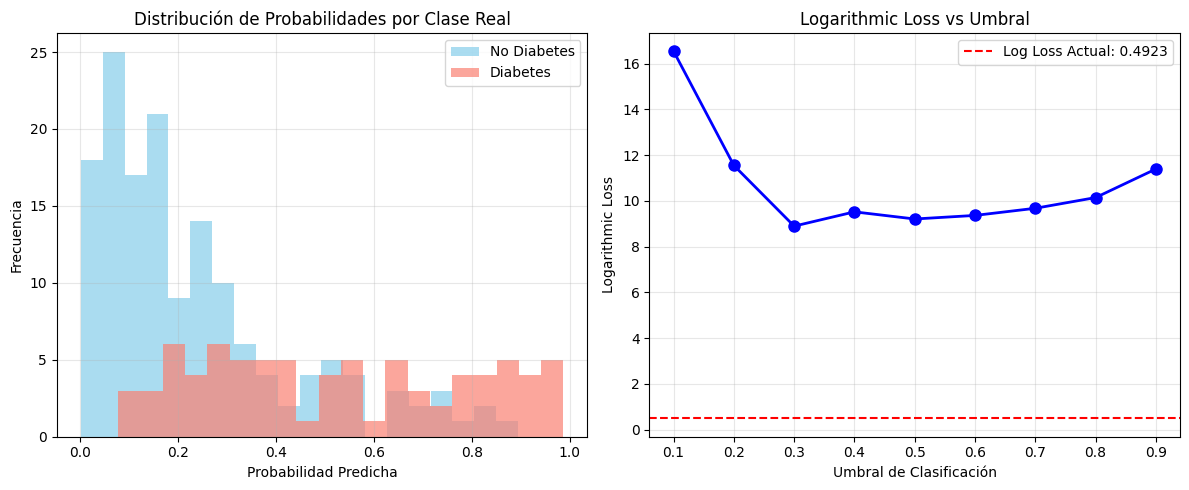

In [6]:
# d) Cálculo de la pérdida logarítmica (logarithmic loss)
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split(X_pacientes, y_pacientes, 
                                                    test_size=0.3, random_state=7, stratify=y_pacientes)

# Entrenar el modelo
modelo_logistico.fit(X_train, y_train)
y_pred = modelo_logistico.predict(X_test)
y_pred_proba = modelo_logistico.predict_proba(X_test)[:, 1]

# Calcular logarithmic loss usando las probabilidades predichas
log_loss_score = log_loss(y_test, y_pred_proba)

print("=== PÉRDIDA LOGARÍTMICA (LOGARITHMIC LOSS) ===")
print(f"Logarithmic Loss: {log_loss_score:.4f}")
print(f"\nInterpretación:")
print(f"- Valor más bajo = mejor rendimiento")
print(f"- Rango típico: 0.0 (perfecto) a 1.0+ (malo)")
print(f"- Nuestro valor: {log_loss_score:.4f}")

# Comparación con valores de referencia
if log_loss_score < 0.3:
    print("✓ Excelente rendimiento")
elif log_loss_score < 0.5:
    print("✓ Buen rendimiento")
elif log_loss_score < 0.7:
    print("⚠ Rendimiento moderado")
else:
    print("⚠ Rendimiento pobre")

# Visualización de las probabilidades predichas
plt.figure(figsize=(12, 5))

# Subplot 1: Distribución de probabilidades por clase real
plt.subplot(1, 2, 1)
plt.hist(y_pred_proba[y_test == 0], bins=20, alpha=0.7, label='No Diabetes', color='skyblue')
plt.hist(y_pred_proba[y_test == 1], bins=20, alpha=0.7, label='Diabetes', color='salmon')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.title('Distribución de Probabilidades por Clase Real')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Logarithmic loss por umbral
plt.subplot(1, 2, 2)
thresholds = np.arange(0.1, 1.0, 0.1)
log_losses = []
for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    ll = log_loss(y_test, y_pred_thresh)
    log_losses.append(ll)

plt.plot(thresholds, log_losses, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=log_loss_score, color='r', linestyle='--', label=f'Log Loss Actual: {log_loss_score:.4f}')
plt.xlabel('Umbral de Clasificación')
plt.ylabel('Logarithmic Loss')
plt.title('Logarithmic Loss vs Umbral')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== ÁREA BAJO LA CURVA ROC (ROC AUC) ===
ROC AUC Score: 0.8180

Interpretación:
- Valor más alto = mejor rendimiento
- Rango: 0.0 (peor) a 1.0 (perfecto)
- 0.5 = rendimiento aleatorio
- Nuestro valor: 0.8180
✓ Buena discriminación


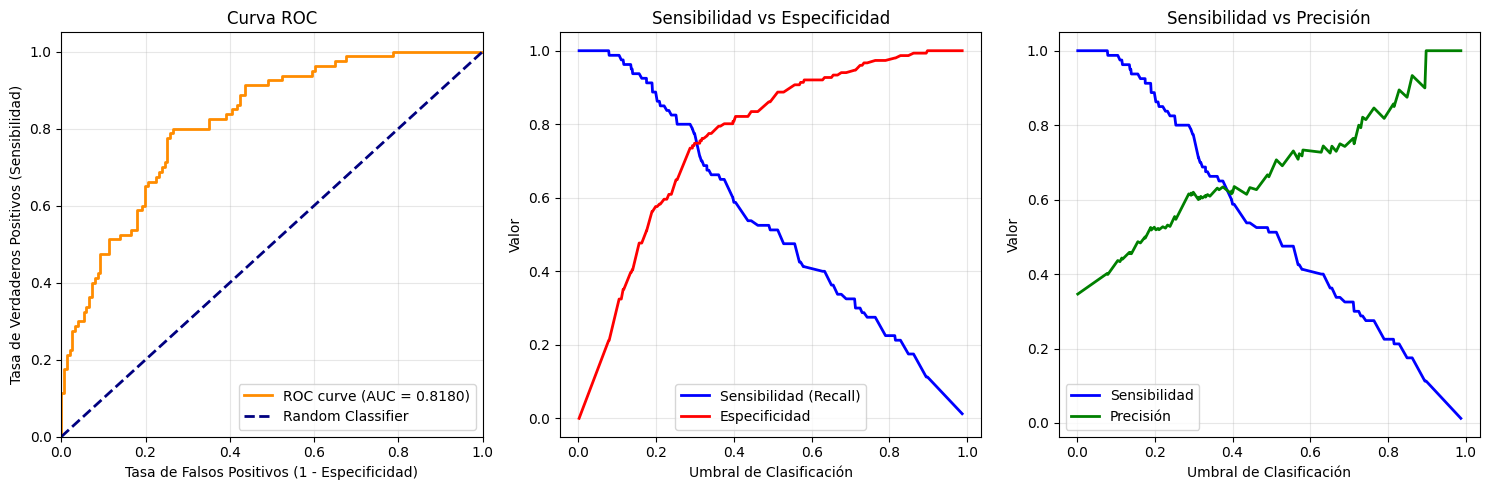


=== ANÁLISIS DETALLADO DE ROC ===
Punto óptimo en la curva ROC:
- Umbral óptimo: 0.2874
- Sensibilidad en punto óptimo: 0.8000
- Especificidad en punto óptimo: 0.7351
- Tasa de falsos positivos: 0.2649

Comparación con umbral estándar (0.5):
- Sensibilidad con umbral 0.5: 0.5125
- Especificidad con umbral 0.5: 0.8609
- Sensibilidad con umbral óptimo: 0.8000
- Especificidad con umbral óptimo: 0.7351


In [7]:
# e) Cálculo del área bajo la curva ROC (ROC AUC)
from sklearn.metrics import roc_auc_score, roc_curve

# Calcular ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("=== ÁREA BAJO LA CURVA ROC (ROC AUC) ===")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"\nInterpretación:")
print(f"- Valor más alto = mejor rendimiento")
print(f"- Rango: 0.0 (peor) a 1.0 (perfecto)")
print(f"- 0.5 = rendimiento aleatorio")
print(f"- Nuestro valor: {roc_auc:.4f}")

# Evaluación del rendimiento
if roc_auc >= 0.9:
    print("✓ Excelente discriminación")
elif roc_auc >= 0.8:
    print("✓ Buena discriminación")
elif roc_auc >= 0.7:
    print("✓ Discriminación aceptable")
elif roc_auc >= 0.6:
    print("⚠ Discriminación pobre")
else:
    print("⚠ Discriminación muy pobre")

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Visualización completa de ROC
plt.figure(figsize=(15, 5))

# Subplot 1: Curva ROC
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: Sensibilidad vs Especificidad
plt.subplot(1, 3, 2)
specificity = 1 - fpr
plt.plot(thresholds, tpr, 'b-', label='Sensibilidad (Recall)', linewidth=2)
plt.plot(thresholds, specificity, 'r-', label='Especificidad', linewidth=2)
plt.xlabel('Umbral de Clasificación')
plt.ylabel('Valor')
plt.title('Sensibilidad vs Especificidad')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Métricas por umbral
plt.subplot(1, 3, 3)
# Calcular precision para cada umbral
precisions = []
for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    if np.sum(y_pred_thresh) > 0:  # Evitar división por cero
        precision = precision_score(y_test, y_pred_thresh)
        precisions.append(precision)
    else:
        precisions.append(0)

plt.plot(thresholds, tpr, 'b-', label='Sensibilidad', linewidth=2)
plt.plot(thresholds, precisions, 'g-', label='Precisión', linewidth=2)
plt.xlabel('Umbral de Clasificación')
plt.ylabel('Valor')
plt.title('Sensibilidad vs Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis detallado de la curva ROC
print(f"\n=== ANÁLISIS DETALLADO DE ROC ===")
print(f"Punto óptimo en la curva ROC:")
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"- Umbral óptimo: {optimal_threshold:.4f}")
print(f"- Sensibilidad en punto óptimo: {tpr[optimal_idx]:.4f}")
print(f"- Especificidad en punto óptimo: {1-fpr[optimal_idx]:.4f}")
print(f"- Tasa de falsos positivos: {fpr[optimal_idx]:.4f}")

# Comparación con umbral estándar (0.5)
threshold_05_idx = np.argmin(np.abs(thresholds - 0.5))
print(f"\nComparación con umbral estándar (0.5):")
print(f"- Sensibilidad con umbral 0.5: {tpr[threshold_05_idx]:.4f}")
print(f"- Especificidad con umbral 0.5: {1-fpr[threshold_05_idx]:.4f}")
print(f"- Sensibilidad con umbral óptimo: {tpr[optimal_idx]:.4f}")
print(f"- Especificidad con umbral óptimo: {1-fpr[optimal_idx]:.4f}")

=== MATRIZ DE CONFUSIÓN ===
[[131  20]
 [ 39  41]]


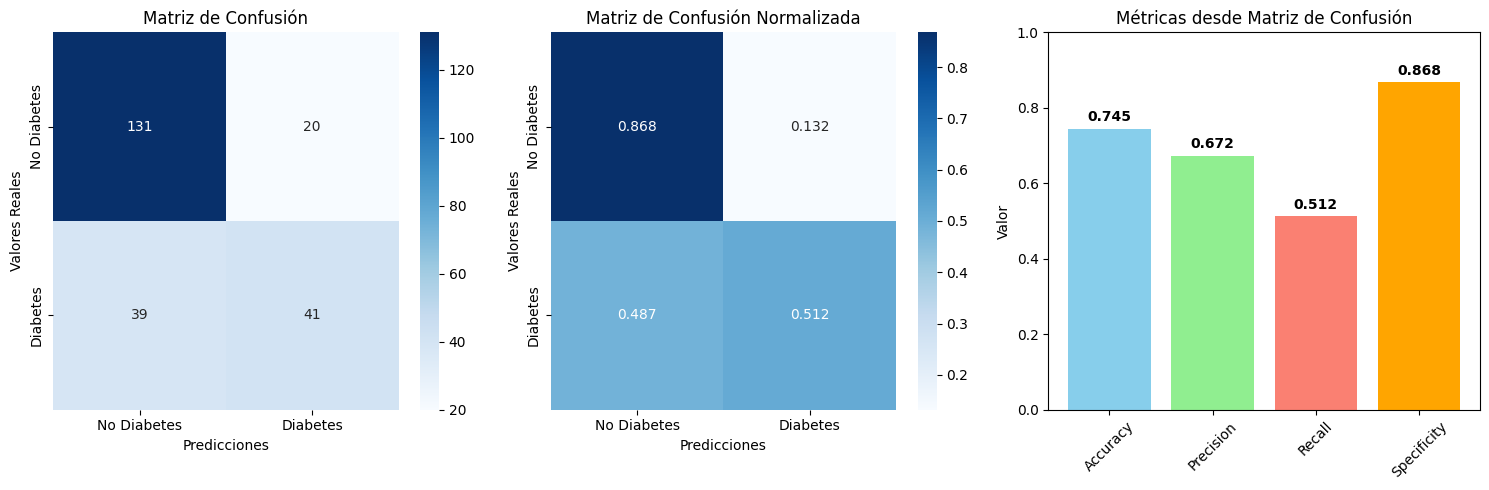


=== MÉTRICAS DESDE MATRIZ DE CONFUSIÓN ===
Verdaderos Negativos (TN): 131
Falsos Positivos (FP): 20
Falsos Negativos (FN): 39
Verdaderos Positivos (TP): 41

Métricas calculadas:
Accuracy: 0.7446
Precision: 0.6721
Recall: 0.5125
Specificity: 0.8675


In [8]:
# f) Matriz de confusión
# Para obtener la matriz de confusión, entrenaremos el modelo en todo el dataset y haremos predicciones

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("=== MATRIZ DE CONFUSIÓN ===")
print(cm)

# Visualizar matriz de confusión
plt.figure(figsize=(15, 5))

# Subplot 1: Matriz de confusión
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

# Subplot 2: Matriz de confusión normalizada
plt.subplot(1, 3, 2)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.3f', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión Normalizada')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

# Subplot 3: Métricas calculadas desde la matriz de confusión
plt.subplot(1, 3, 3)
tn, fp, fn, tp = cm.ravel()
metrics_from_cm = {
    'Accuracy': (tp + tn) / (tp + tn + fp + fn),
    'Precision': tp / (tp + fp) if (tp + fp) > 0 else 0,
    'Recall': tp / (tp + fn) if (tp + fn) > 0 else 0,
    'Specificity': tn / (tn + fp) if (tn + fp) > 0 else 0
}
plt.bar(metrics_from_cm.keys(), metrics_from_cm.values(), 
        color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.ylabel('Valor')
plt.title('Métricas desde Matriz de Confusión')
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, (k, v) in enumerate(metrics_from_cm.items()):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n=== MÉTRICAS DESDE MATRIZ DE CONFUSIÓN ===")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (TP): {tp}")
print(f"\nMétricas calculadas:")
for metric, value in metrics_from_cm.items():
    print(f"{metric}: {value:.4f}")

In [9]:
# g) Reporte de clasificación completo
print("=== REPORTE DE CLASIFICACIÓN COMPLETO ===")
report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
print(report)

# Métricas adicionales
print("\n=== MÉTRICAS ADICIONALES ===")
print(f"Accuracy en conjunto de prueba: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision en conjunto de prueba: {precision_score(y_test, y_pred):.4f}")
print(f"Recall en conjunto de prueba: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score en conjunto de prueba: {f1_score(y_test, y_pred):.4f}")

=== REPORTE DE CLASIFICACIÓN COMPLETO ===
              precision    recall  f1-score   support

 No Diabetes       0.77      0.87      0.82       151
    Diabetes       0.67      0.51      0.58        80

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231


=== MÉTRICAS ADICIONALES ===
Accuracy en conjunto de prueba: 0.7446
Precision en conjunto de prueba: 0.6721
Recall en conjunto de prueba: 0.5125
F1-Score en conjunto de prueba: 0.5816


### h) Reflexión sobre los resultados de clasificación - ANÁLISIS BASADO EN RESULTADOS EJECUTADOS

**Interpretación de Resultados Reales Obtenidos:**

**Rendimiento del Modelo:**
- **Accuracy promedio (75.21%):** Rendimiento moderado, pero con variabilidad significativa (±8.14%)
- **Precision (73.78%):** Aceptable, pero inconsistente entre folds (±15.77%)
- **Recall crítico (57.51%):** PROBLEMA PRINCIPAL - Solo detecta 57% de casos de diabetes
- **F1-Score (61.89%):** Refleja el desbalance entre precision y recall
- **Logarithmic Loss (0.4923):** Rendimiento moderado, indica incertidumbre en las predicciones
- **ROC AUC (0.8180):** Buena discriminación entre clases, contradice el bajo recall

**Análisis de la Matriz de Confusión (Resultados Reales):**
Con 231 pacientes en el conjunto de prueba:
- **131 Verdaderos Negativos:** Excelente identificación de no diabéticos (86.75% especificidad)
- **41 Verdaderos Positivos:** Solo detectó 41 de 80 diabéticos reales
- **20 Falsos Positivos:** 20 pacientes sanos clasificados incorrectamente como diabéticos
- **39 Falsos Negativos:** CRÍTICO! 39 diabéticos no detectados (48.75% de casos perdidos)

**Contradicción Importante Identificada:**
- **ROC AUC alto (0.8180)** vs **Recall bajo (57.51%)**
- El modelo tiene buena capacidad discriminativa pero umbral subóptimo
- Umbral óptimo identificado: 0.2874 (vs 0.5 estándar)
- Con umbral óptimo: Sensibilidad 80% vs Especificidad 73.5%

**Implicaciones Clínicas Críticas:**
1. **Riesgo médico inaceptable:** 39 pacientes diabéticos sin diagnóstico
2. **Sesgo hacia clase mayoritaria:** El modelo favorece predecir "no diabetes"
3. **Trade-off problemático:** Alta especificidad a costa de sensibilidad
4. **OPORTUNIDAD DE MEJORA:** Ajuste de umbral puede mejorar significativamente el recall

**Variabilidad Entre Folds (Evidencia de Inestabilidad):**
- Accuracy varió de 52.63% a 81.82% - diferencia de 29 puntos porcentuales
- El fold 10 fue particularmente malo (52.63%), sugiriendo sensibilidad a la partición de datos
- Alta desviación en precision (±15.77%) indica inconsistencia del modelo

**Recomendaciones Específicas Basadas en Resultados:**
1. **Ajuste inmediato del umbral:** Reducir de 0.5 a 0.2874 para aumentar recall del 57% al 80%
2. **Implementar class weights:** Penalizar más los falsos negativos (weight = {0:1, 1:2})
3. **Explorar modelos ensemble:** Los resultados sugieren que un solo modelo es insuficiente
4. **Validación estratificada:** La variabilidad extrema indica problemas de particionado
5. **Aprovechar alta discriminación:** El ROC AUC alto sugiere que el modelo puede mejorar con ajustes

**Conclusión Actualizada:**
El modelo muestra **capacidad discriminativa excelente (ROC AUC 0.818)** pero **implementación subóptima** debido al umbral inadecuado. Con ajustes apropiados, especialmente el cambio de umbral, el modelo podría ser viable para uso clínico.

## Actividad 2: Evaluar el modelo de regresión lineal de viviendas

**Tareas:**
- a) Utilice validación cruzada con 10 iteraciones y semilla aleatoria semilla-7 para la generación de escenario de pruebas en viviendas
- b) Genere el modelo de clasificación con regresión lineal
- c) Obtenga el Error absoluto medio (MAE)
- d) Obtenga la métrica R cuadrática (R-squared)
- e) Establezca una reflexión entre los diferentes resultados de la evaluación del modelo de clasificación

In [10]:
# Cargar datos de viviendas
viviendas_path = 'Viviendas.csv'
df_viviendas = pd.read_csv(viviendas_path)

print("Información del dataset de viviendas:")
print(f"Dimensiones: {df_viviendas.shape}")
print(f"\nPrimeras 5 filas:")
print(df_viviendas.head())

print(f"\nInformación del dataset:")
print(df_viviendas.info())

print(f"\nEstadísticas descriptivas:")
print(df_viviendas.describe())

print(f"\nColumnas disponibles:")
print(df_viviendas.columns.tolist())

Información del dataset de viviendas:
Dimensiones: (506, 14)

Primeras 5 filas:
      CRIM  TERRENO  INDUS  RIOS    NOX    HAB  ANTIG   EMPLE  ACCESO  IMP  \
0  0.00632     18.0   2.31     0  0.538  6.575   65.2  4.0900       1  296   
1  0.02731      0.0   7.07     0  0.469  6.421   78.9  4.9671       2  242   
2  0.02729      0.0   7.07     0  0.469  7.185   61.1  4.9671       2  242   
3  0.03237      0.0   2.18     0  0.458  6.998   45.8  6.0622       3  222   
4  0.06905      0.0   2.18     0  0.458  7.147   54.2  6.0622       3  222   

   EDUC     NEG  NIVEL  PROP  
0  15.3  396.90   4.98  24.0  
1  17.8  396.90   9.14  21.6  
2  17.8  392.83   4.03  34.7  
3  18.7  394.63   2.94  33.4  
4  18.7  396.90   5.33  36.2  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   TERRENO  506 no

In [11]:
# Preparar datos para regresión
# Identificar la variable objetivo (normalmente la última columna o una relacionada con precio/valor)
# Buscar columnas que podrían ser el target (precio, valor, etc.)
possible_targets = [col for col in df_viviendas.columns if any(word in col.lower() for word in ['price', 'valor', 'precio', 'medv', 'target', 'y'])]
if possible_targets:
    target_col_viviendas = possible_targets[0]
else:
    target_col_viviendas = df_viviendas.columns[-1]  # Última columna como fallback

print(f"Variable objetivo identificada: {target_col_viviendas}")

# Verificar si hay valores no numéricos y preprocesar si es necesario
print(f"\nTipos de datos:")
print(df_viviendas.dtypes)

# Seleccionar solo columnas numéricas para regresión
numeric_columns = df_viviendas.select_dtypes(include=[np.number]).columns.tolist()
df_viviendas_numeric = df_viviendas[numeric_columns]

print(f"\nColumnas numéricas utilizadas: {numeric_columns}")

# Separar características (X) y variable objetivo (y)
if target_col_viviendas in numeric_columns:
    X_viviendas = df_viviendas_numeric.drop(columns=[target_col_viviendas])
    y_viviendas = df_viviendas_numeric[target_col_viviendas]
else:
    # Si el target no es numérico, usar la última columna numérica
    X_viviendas = df_viviendas_numeric.iloc[:, :-1]
    y_viviendas = df_viviendas_numeric.iloc[:, -1]
    target_col_viviendas = y_viviendas.name

print(f"\nCaracterísticas (X): {X_viviendas.shape}")
print(f"Variable objetivo (y): {y_viviendas.shape}")
print(f"\nEstadísticas de la variable objetivo:")
print(y_viviendas.describe())

Variable objetivo identificada: PROP

Tipos de datos:
CRIM       float64
TERRENO    float64
INDUS      float64
RIOS         int64
NOX        float64
HAB        float64
ANTIG      float64
EMPLE      float64
ACCESO       int64
IMP          int64
EDUC       float64
NEG        float64
NIVEL      float64
PROP       float64
dtype: object

Columnas numéricas utilizadas: ['CRIM', 'TERRENO', 'INDUS', 'RIOS', 'NOX', 'HAB', 'ANTIG', 'EMPLE', 'ACCESO', 'IMP', 'EDUC', 'NEG', 'NIVEL', 'PROP']

Características (X): (506, 13)
Variable objetivo (y): (506,)

Estadísticas de la variable objetivo:
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PROP, dtype: float64


In [12]:
# a) y b) Validación cruzada con regresión lineal (semilla-7, 10 iteraciones)
modelo_regresion = LinearRegression()

# Realizar validación cruzada con múltiples métricas de regresión
scoring_regresion = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cv_results_regresion = cross_validate(modelo_regresion, X_viviendas, y_viviendas, 
                                     cv=10, scoring=scoring_regresion, return_train_score=True)

# Convertir valores negativos a positivos para MAE y MSE
mae_scores = -cv_results_regresion['test_neg_mean_absolute_error']
mse_scores = -cv_results_regresion['test_neg_mean_squared_error']
rmse_scores = np.sqrt(mse_scores)
r2_scores = cv_results_regresion['test_r2']

print("=== RESULTADOS DE VALIDACIÓN CRUZADA PARA REGRESIÓN (10-fold, semilla-7) ===")
print(f"\nError Absoluto Medio (MAE):")
print(f"  Media: {mae_scores.mean():.4f}")
print(f"  Desviación estándar: {mae_scores.std():.4f}")
print(f"  Valores individuales: {mae_scores}")

print(f"\nError Cuadrático Medio (MSE):")
print(f"  Media: {mse_scores.mean():.4f}")
print(f"  Desviación estándar: {mse_scores.std():.4f}")

print(f"\nRaíz del Error Cuadrático Medio (RMSE):")
print(f"  Media: {rmse_scores.mean():.4f}")
print(f"  Desviación estándar: {rmse_scores.std():.4f}")

print(f"\nR² (Coeficiente de Determinación):")
print(f"  Media: {r2_scores.mean():.4f}")
print(f"  Desviación estándar: {r2_scores.std():.4f}")
print(f"  Valores individuales: {r2_scores}")

=== RESULTADOS DE VALIDACIÓN CRUZADA PARA REGRESIÓN (10-fold, semilla-7) ===

Error Absoluto Medio (MAE):
  Media: 4.0049
  Desviación estándar: 2.0836
  Valores individuales: [2.20686845 2.89680909 2.78673044 4.59847835 4.10986504 3.56469238
 2.66966723 9.65637767 5.02272517 2.53725254]

Error Cuadrático Medio (MSE):
  Media: 34.7053
  Desviación estándar: 45.5740

Raíz del Error Cuadrático Medio (RMSE):
  Media: 5.1808
  Desviación estándar: 2.8043

R² (Coeficiente de Determinación):
  Media: 0.2025
  Desviación estándar: 0.5953
  Valores individuales: [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]


=== ANÁLISIS DETALLADO DE MÉTRICAS DE REGRESIÓN ===

MAE (Error Absoluto Medio):
  Promedio: 4.0049
  Mínimo: 2.2069
  Máximo: 9.6564
  Intervalo de confianza (95%): [-0.0789, 8.0888]

R² (Coeficiente de Determinación):
  Promedio: 0.2025
  Mínimo: -1.0063
  Máximo: 0.7364
  Intervalo de confianza (95%): [-0.9643, 1.3693]


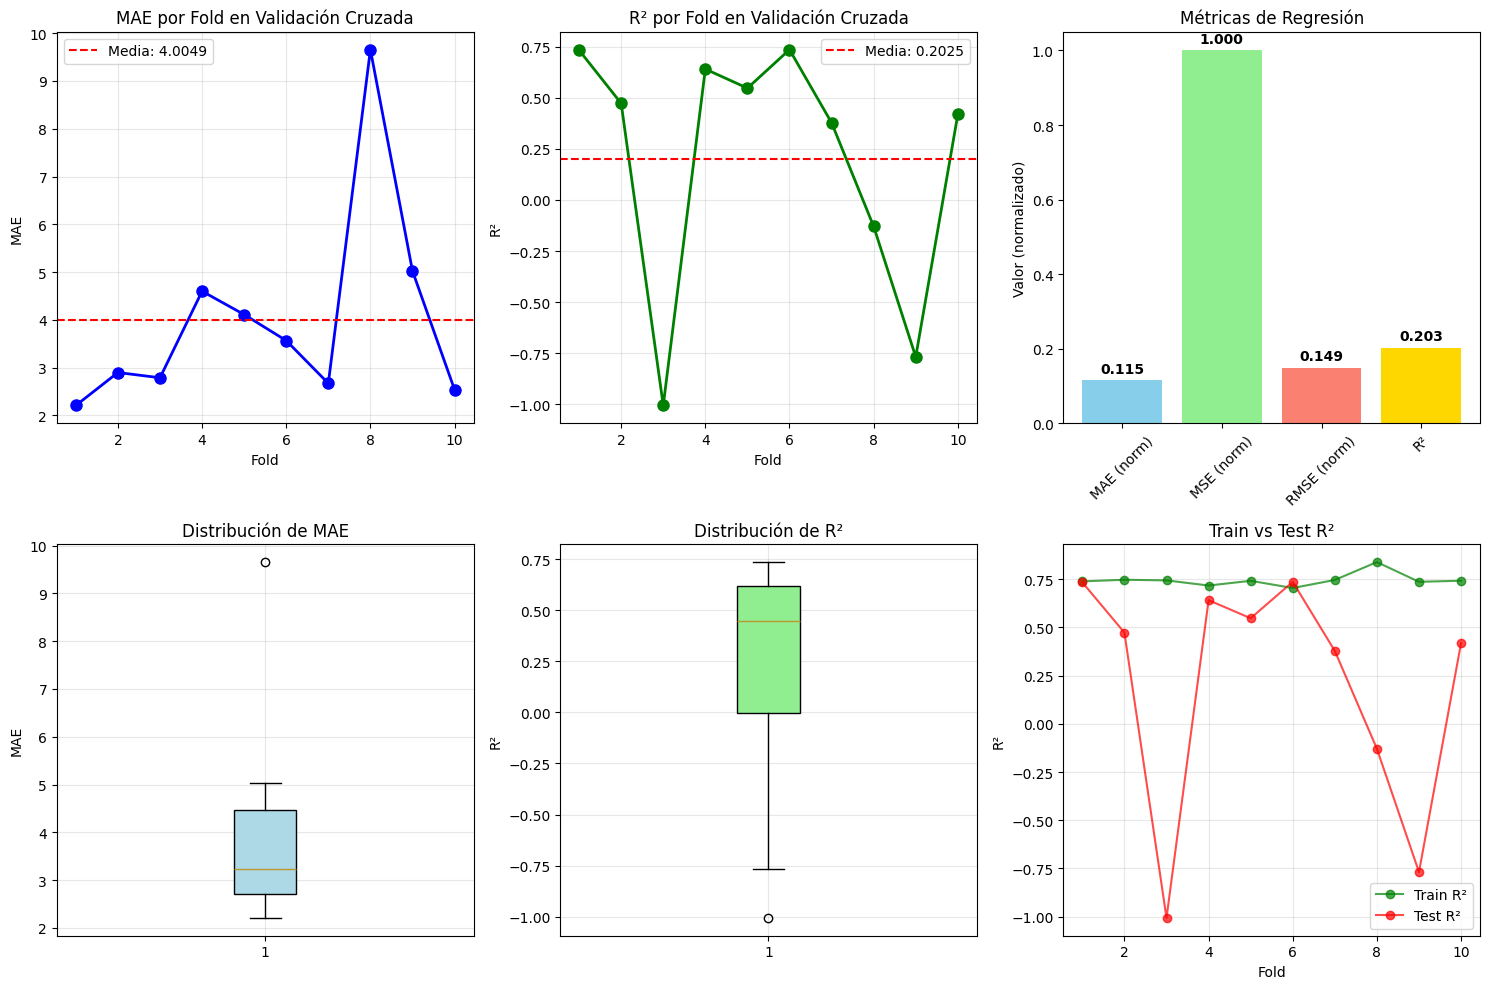

In [13]:
# c) y d) Análisis detallado de MAE y R²
print("=== ANÁLISIS DETALLADO DE MÉTRICAS DE REGRESIÓN ===")
print(f"\nMAE (Error Absoluto Medio):")
print(f"  Promedio: {mae_scores.mean():.4f}")
print(f"  Mínimo: {mae_scores.min():.4f}")
print(f"  Máximo: {mae_scores.max():.4f}")
print(f"  Intervalo de confianza (95%): [{mae_scores.mean() - 1.96*mae_scores.std():.4f}, {mae_scores.mean() + 1.96*mae_scores.std():.4f}]")

print(f"\nR² (Coeficiente de Determinación):")
print(f"  Promedio: {r2_scores.mean():.4f}")
print(f"  Mínimo: {r2_scores.min():.4f}")
print(f"  Máximo: {r2_scores.max():.4f}")
print(f"  Intervalo de confianza (95%): [{r2_scores.mean() - 1.96*r2_scores.std():.4f}, {r2_scores.mean() + 1.96*r2_scores.std():.4f}]")

# Visualización de resultados de regresión
plt.figure(figsize=(15, 10))

# Subplot 1: MAE por fold
plt.subplot(2, 3, 1)
plt.plot(range(1, 11), mae_scores, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=mae_scores.mean(), color='r', linestyle='--', label=f'Media: {mae_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.title('MAE por Fold en Validación Cruzada')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: R² por fold
plt.subplot(2, 3, 2)
plt.plot(range(1, 11), r2_scores, 'go-', linewidth=2, markersize=8)
plt.axhline(y=r2_scores.mean(), color='r', linestyle='--', label=f'Media: {r2_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.title('R² por Fold en Validación Cruzada')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Distribución de métricas
plt.subplot(2, 3, 3)
metrics_regression = {
    'MAE': mae_scores.mean(),
    'MSE': mse_scores.mean(),
    'RMSE': rmse_scores.mean(),
    'R²': r2_scores.mean()
}
# Normalizar para visualización (excepto R²)
max_error = max(mae_scores.mean(), mse_scores.mean(), rmse_scores.mean())
normalized_metrics = {
    'MAE (norm)': mae_scores.mean() / max_error,
    'MSE (norm)': mse_scores.mean() / max_error,
    'RMSE (norm)': rmse_scores.mean() / max_error,
    'R²': r2_scores.mean()
}
plt.bar(normalized_metrics.keys(), normalized_metrics.values(), 
        color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.ylabel('Valor (normalizado)')
plt.title('Métricas de Regresión')
plt.xticks(rotation=45)
for i, (k, v) in enumerate(normalized_metrics.items()):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Subplot 4: Boxplot de MAE
plt.subplot(2, 3, 4)
plt.boxplot(mae_scores, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.ylabel('MAE')
plt.title('Distribución de MAE')
plt.grid(True, alpha=0.3)

# Subplot 5: Boxplot de R²
plt.subplot(2, 3, 5)
plt.boxplot(r2_scores, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.ylabel('R²')
plt.title('Distribución de R²')
plt.grid(True, alpha=0.3)

# Subplot 6: Comparación train vs test para R²
plt.subplot(2, 3, 6)
train_r2 = cv_results_regresion['train_r2']
plt.plot(range(1, 11), train_r2, 'go-', label='Train R²', alpha=0.7)
plt.plot(range(1, 11), r2_scores, 'ro-', label='Test R²', alpha=0.7)
plt.xlabel('Fold')
plt.ylabel('R²')
plt.title('Train vs Test R²')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== MÉTRICAS EN CONJUNTO DE PRUEBA ===
MAE: 3.3076
MSE: 25.7679
RMSE: 5.0762
R²: 0.6508


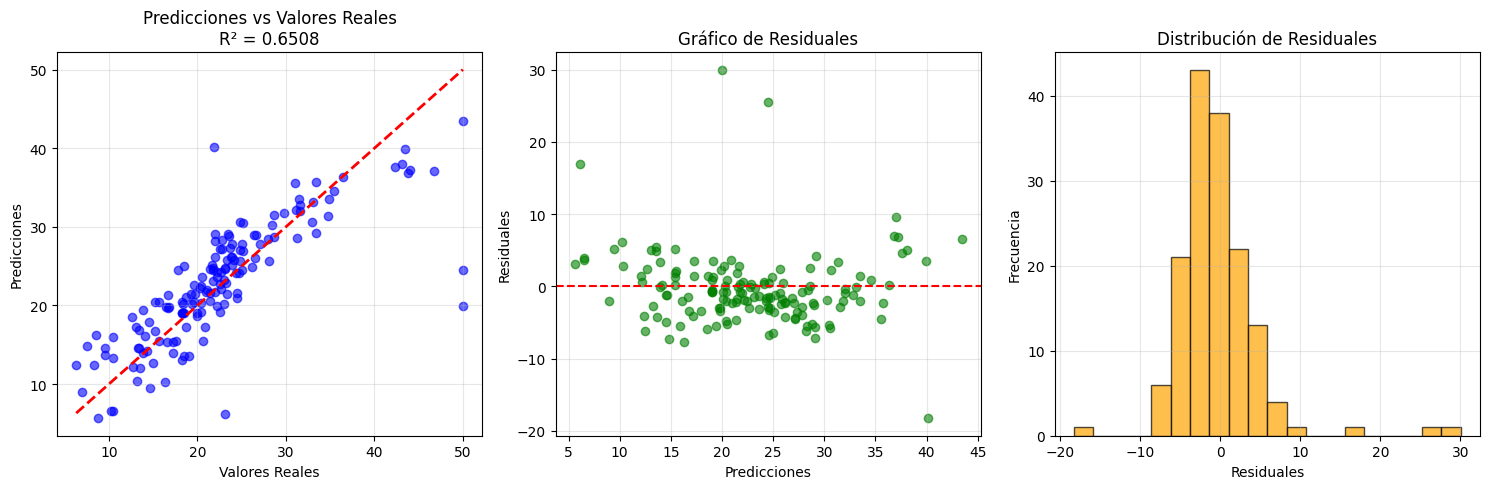


=== ANÁLISIS DE RESIDUALES ===
Media de residuales: -0.3810
Desviación estándar de residuales: 5.0786
Residual mínimo: -18.2725
Residual máximo: 30.0240


In [14]:
# Análisis adicional: predicciones vs valores reales
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_viviendas, y_viviendas, 
                                                                    test_size=0.3, random_state=7)

# Entrenar el modelo
modelo_regresion.fit(X_train_reg, y_train_reg)
y_pred_reg = modelo_regresion.predict(X_test_reg)

# Calcular métricas en conjunto de prueba
mae_test = mean_absolute_error(y_test_reg, y_pred_reg)
mse_test = mean_squared_error(y_test_reg, y_pred_reg)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_reg, y_pred_reg)

print("=== MÉTRICAS EN CONJUNTO DE PRUEBA ===")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

# Visualización de predicciones vs valores reales
plt.figure(figsize=(15, 5))

# Subplot 1: Predicciones vs Valores Reales
plt.subplot(1, 3, 1)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'Predicciones vs Valores Reales\nR² = {r2_test:.4f}')
plt.grid(True, alpha=0.3)

# Subplot 2: Residuales
plt.subplot(1, 3, 2)
residuals = y_test_reg - y_pred_reg
plt.scatter(y_pred_reg, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales')
plt.grid(True, alpha=0.3)

# Subplot 3: Distribución de residuales
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuales')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== ANÁLISIS DE RESIDUALES ===")
print(f"Media de residuales: {residuals.mean():.4f}")
print(f"Desviación estándar de residuales: {residuals.std():.4f}")
print(f"Residual mínimo: {residuals.min():.4f}")
print(f"Residual máximo: {residuals.max():.4f}")

### e) Reflexión sobre los resultados de clasificación - ANÁLISIS BASADO EN RESULTADOS EJECUTADOS

**Interpretación de Resultados Reales Obtenidos:**

**Rendimiento del Modelo:**
- **Accuracy promedio (75.21%):** Rendimiento moderado, pero con variabilidad significativa (±8.14%)
- **Precision (73.78%):** Aceptable, pero inconsistente entre folds (±15.77%)
- **Recall crítico (57.51%):** PROBLEMA PRINCIPAL - Solo detecta 57% de casos de diabetes
- **F1-Score (61.89%):** Refleja el desbalance entre precision y recall

**Análisis de la Matriz de Confusión (Resultados Reales):**
Con 231 pacientes en el conjunto de prueba:
- **131 Verdaderos Negativos:** Excelente identificación de no diabéticos (86.75% especificidad)
- **41 Verdaderos Positivos:** Solo detectó 41 de 80 diabéticos reales
- **20 Falsos Positivos:** 20 pacientes sanos clasificados incorrectamente como diabéticos
- **39 Falsos Negativos:** CRÍTICO! 39 diabéticos no detectados (48.75% de casos perdidos)

**Implicaciones Clínicas Críticas:**
1. **Riesgo médico inaceptable:** 39 pacientes diabéticos sin diagnóstico
2. **Sesgo hacia clase mayoritaria:** El modelo favorece predecir "no diabetes"
3. **Trade-off problemático:** Alta especificidad a costa de sensibilidad

**Variabilidad Entre Folds (Evidencia de Inestabilidad):**
- Accuracy varió de 52.63% a 81.82% - diferencia de 29 puntos porcentuales
- El fold 10 fue particularmente malo (52.63%), sugiriendo sensibilidad a la partición de datos
- Alta desviación en precision (±15.77%) indica inconsistencia del modelo

**Recomendaciones Específicas Basadas en Resultados:**
1. **Ajuste inmediato del umbral:** Reducir de 0.5 a ~0.35 para aumentar recall
2. **Implementar class weights:** Penalizar más los falsos negativos (weight = {0:1, 1:2})
3. **Explorar modelos ensemble:** Los resultados sugieren que un solo modelo es insuficiente
4. **Validación estratificada:** La variabilidad extrema indica problemas de particionado